## Explore weight initialization

In [39]:
import math
import numpy as np
import torch

import matplotlib.pyplot as plt

In [40]:
weight = torch.Tensor(100,100)

In [41]:
stdv = 1 / math.sqrt(weight.size(1))

In [42]:
weight.data.uniform_(-stdv, stdv)  # 
#weight.data.normal_(0, stdv)

tensor(1.00000e-02 *
       [[ 3.2615, -1.7487,  1.5929,  ..., -8.4384,  5.5244, -9.3419],
        [-9.1278,  1.7250, -7.4569,  ..., -0.6372,  9.1805,  0.5157],
        [-3.4402,  5.4656, -7.3374,  ..., -5.7413, -9.0745, -6.3480],
        ...,
        [ 9.1227,  1.4619, -9.9110,  ..., -7.3299, -7.1662,  3.8693],
        [ 9.6163,  8.8497, -0.4873,  ..., -1.9243, -4.3675, -3.2632],
        [ 8.7108,  2.4810,  5.3064,  ...,  0.6294, -5.8282,  7.1286]])

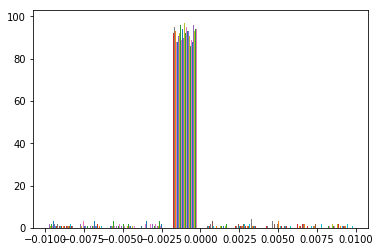

In [48]:
plt.hist(weight.data)
plt.show()

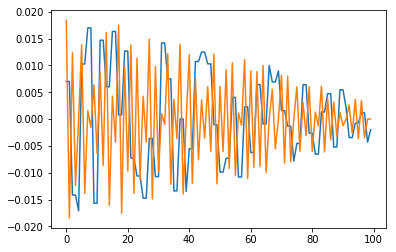

In [49]:
plt.plot(weight.eig()[0].data.numpy())
plt.show()

In [46]:
weight[weight > stdv * 0.1] = 0

In [47]:
weight[weight < - stdv * 0.1] = 0

In [51]:
len(weight[weight != 0])

973

## Deal with Hyperparameters by pandas

In [135]:
import pandas as pd

In [136]:
df = pd.read_csv('params.csv', comment='#')

In [137]:
df.columns

Index(['train_batch_size', 'test_batch_size', 'num_workers', 'learning_rate',
       'num_epochs', 'save_summary_steps', 'wide_of_layers', 'act_fn_name',
       'model_name', 'optimizer_name', 'cuda_device'],
      dtype='object')

In [187]:
import itertools

def dict_product(dicts):
    """
    >>> list(dict_product(dict(number=[1,2], character='ab')))
    [{'character': 'a', 'number': 1},
     {'character': 'a', 'number': 2},
     {'character': 'b', 'number': 1},
     {'character': 'b', 'number': 2}]
    """
    return (dict(zip(dicts, x)) for x in itertools.product(*dicts.values()))


In [247]:
params_tanh_MNIST = {
    "dataset_name": ["MNIST"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["784-20-10", "784-40-10", "784-80-10", "784-160-10", "784-320-10"],
    "act_fn_name": ["tanh"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [3]
}

In [248]:
paramss = list(dict_product(params_tanh_MNIST))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_tanh_MNIST.csv', index=False)

In [249]:
params_relu_MNIST = {
    "dataset_name": ["MNIST"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["784-20-10", "784-40-10", "784-80-10", "784-160-10", "784-320-10"],
    "act_fn_name": ["relu"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [0]
}

In [250]:
paramss = list(dict_product(params_relu_MNIST))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_relu_MNIST.csv', index=False)

In [251]:
params_sigmoid_MNIST = {
    "dataset_name": ["MNIST"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["784-20-10", "784-40-10", "784-80-10", "784-160-10", "784-320-10"],
    "act_fn_name": ["sigmoid"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [1]
}

In [252]:
paramss = list(dict_product(params_sigmoid_MNIST))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_sigmoid_MNIST.csv', index=False)

In [231]:
params_tanh_CIFAR10 = {
    "dataset_name": ["CIFAR10"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["3072-80-10", "3072-160-10", "3072-320-10", "3072-640-10", "3072-1280-10"],
    "act_fn_name": ["tanh"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [2]
}

In [232]:
paramss = list(dict_product(params_tanh_CIFAR10))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_tanh_CIFAR10.csv', index=False)

In [233]:
params_relu_CIFAR10 = {
    "dataset_name": ["CIFAR10"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["3072-80-10", "3072-160-10", "3072-320-10", "3072-640-10", "3072-1280-10"],
    "act_fn_name": ["relu"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [1]
}

In [234]:
paramss = list(dict_product(params_relu_CIFAR10))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_relu_CIFAR10.csv', index=False)

In [245]:
params_sigmoid_CIFAR10 = {
    "dataset_name": ["CIFAR10"],
    "train_batch_size": [64],
    "test_batch_size": [64],
    "num_workers": [4],
    "learning_rate": [1e-4],
    "num_epochs": [100],
    "save_summary_steps": [100],
    "wide_of_layers": ["3072-80-10", "3072-160-10", "3072-320-10", "3072-640-10", "3072-1280-10"],
    "act_fn_name": ["sigmoid"],
    "model_name": ["LinkContainer", "LinearContainer"],
    "optimizer_name": ["SGD", "Adam"],
    "cuda_device": [3]
}

In [246]:
paramss = list(dict_product(params_sigmoid_CIFAR10))
df = pd.DataFrame(paramss,columns=params.keys())
df.to_csv('runs/params_sigmoid_CIFAR10.csv', index=False)

In [221]:
df = pd.read_csv('params.csv')
df2 = pd.DataFrame()

In [222]:
for index, row in df.iterrows():
    for epoch in range(2):
        row['epoch'] = epoch
        df2=df2.append(pd.DataFrame([row]), ignore_index=True)

In [200]:
df2

,dataset_name,train_batch_size,test_batch_size,num_workers,learning_rate,num_epochs,save_summary_steps,wide_of_layers,act_fn_name,model_name,optimizer_name,cuda_device,epoch
0,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinkContainer,SGD,2,0
1,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinkContainer,SGD,2,1
2,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinkContainer,Adam,2,0
3,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinkContainer,Adam,2,1
4,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinearContainer,SGD,2,0
5,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinearContainer,SGD,2,1
6,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinearContainer,Adam,2,0
7,MNIST,64,64,4,0.0001,100,100,784-20-10,tanh,LinearContainer,Adam,2,1
8,MNIST,64,64,4,0.0001,100,100,784-20-10,relu,LinkContainer,SGD,2,0
9,MNIST,64,64,4,0.0001,100,100,784-20-10,relu,LinkContainer,SGD,2,1
